Comparisons of locomotion predictions of different mechanistic latent variable models.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_plot

# Basic comparison of linear, LN, and MA single vs population fits.

In [2]:
KBEHAVS = ['FFV', 'FLS']

rslts = {kbehav: [] for kbehav in KBEHAVS}

# purely linear fits
for kbehav in KBEHAVS:
    fit_data = np.load(f'data/simple/mlv/lin_filter/rc_lin_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
    nsplit = len(fit_data['r2_test'])
    
    key = 'Lin. filt. (r-cos.)'
    r2 = fit_data['r2_test'].mean()
    err = fit_data['r2_test'].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append((key, r2, err))
    
    fit_data = np.load(f'data/simple/mlv/lin_filter/rect_lin_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
    nsplit = len(fit_data['r2_test'])
    
    key = 'Lin. filt (rect)'
    r2 = fit_data['r2_test'].mean()
    err = fit_data['r2_test'].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append((key, r2, err))

In [3]:
labels = {'lin': 'Lin.', 'ln': 'LN', 'ma': 'MA'}
for nrl_mdl in ['lin', 'ln', 'ma']:
    # load single ROI results
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv/neur_basic/baker_single_{nrl_mdl}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
        nsplit, nr = fit_data['r2s_test'].shape
        
        # median single variance explained
        key = f'{labels[nrl_mdl]} neur (avg)'
        
        idx_med = np.argsort(fit_data['r2s_test'].mean(axis=0))[nr//2]  # arg-median
        r2 = fit_data['r2s_test'][:, idx_med].mean()
        err = fit_data['r2s_test'][:, idx_med].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))
        
        # best single variance explained
        key = f'{labels[nrl_mdl]} neur (best)'
        
        idx_best = fit_data['r2s_test'].mean(axis=0).argmax()
        r2 = fit_data['r2s_test'][:, idx_best].mean()
        err = fit_data['r2s_test'][:, idx_best].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))
        
    # load population ROI results
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv/neur_basic/baker_{nrl_mdl}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
        
        key = f'{labels[nrl_mdl]} neur pop.'
        
        r2 = fit_data['r2_test'].mean()
        nsplit = len(fit_data['r2_test'])
        err = fit_data['r2_test'].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))

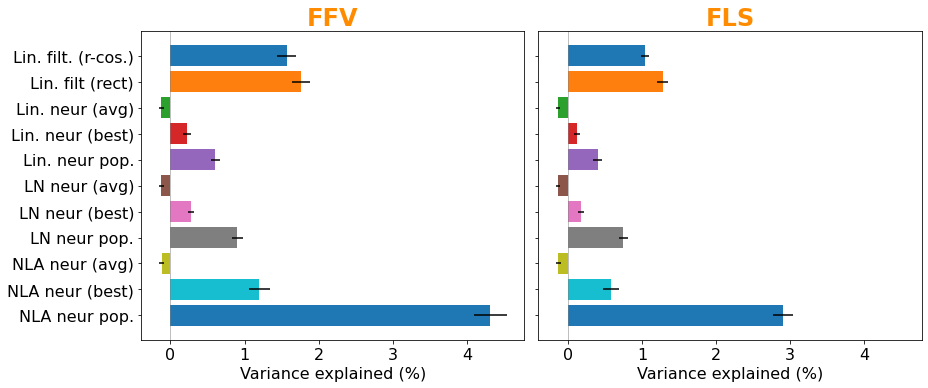

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(13, .5*len(rslts[KBEHAVS[0]])), tight_layout=True, sharex=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Variance explained (%)', font_size=16)
    ax.set_title(kbehav, color='darkorange', fontweight='bold', fontsize=24)

## Predictions of "best" behavioral variable FFV_MN_60 (FFV with one-minute forward smoothing)
And using only NM91 and ZH23 strains

In [5]:
KBEHAVS = ['FFV_MN_60', 'FLS_MN_60']

rslts = {kbehav: [] for kbehav in KBEHAVS}

# get prediction from timestamp only
for kbehav in KBEHAVS:
    fit_data = np.load(f'data/simple/mlv/neur_basic/nm91_zh23_{kbehav.lower()}_from_time.npy', allow_pickle=True)[0]
    r2 = fit_data['r2_test'][kbehav].mean()
    nsplit = len(fit_data['r2_test'][kbehav])
    err = fit_data['r2_test'][kbehav].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append(('Elapsed time', r2, err))

# purely linear fits
for kbehav in KBEHAVS:
    fit_data = np.load(f'data/simple/mlv/lin_filter/rc_lin_nm91_zh23_{kbehav.lower()}_ridge_alpha_10.npy', allow_pickle=True)[0]
    nsplit = len(fit_data['r2_test'])
    
    key = '90 s linear filter'
    r2 = fit_data['r2_test'][kbehav].mean()
    err = fit_data['r2_test'][kbehav].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append((key, r2, err))
    
labels = {'lin': 'Lin.', 'linr': 'Lin (ridge)', 'lin2e': 'Lin (2exp)', 'ln': 'LN', 'lnr': 'LN (ridge)', 'ln2e': 'LN (2exp)', 'ma': 'MA', 'masoff': 'MASOFF', 'maqs': 'MAQS', 'maqsrb': 'MAQSRB', 'maqpsrb': 'MAQPSRB'}

for nrl_mdl in ['lin', 'linr', 'lin2e', 'ln', 'lnr', 'ln2e', 'ma', 'masoff', 'maqs', 'maqsrb', 'maqpsrb']:
    # load single ROI results
    for kbehav in KBEHAVS:
        try:
            key = f'Single {labels[nrl_mdl]} (avg)'
            fit_data = np.load(f'data/simple/mlv/neur_basic/baker_single_{nrl_mdl}_nm91_zh23_{kbehav.lower()}.npy', allow_pickle=True)[0]
            nsplit, nr = fit_data['r2s_test'][kbehav].shape

            # median single variance explained

            idx_med = np.argsort(fit_data['r2s_test'][kbehav].mean(axis=0))[nr//2]  # arg-median
            r2 = fit_data['r2s_test'][kbehav][:, idx_med].mean()
            err = fit_data['r2s_test'][kbehav][:, idx_med].std()/np.sqrt(nsplit)

            rslts[kbehav].append((key, r2, err))

            # best single variance explained
            key = f'Single {labels[nrl_mdl]} (best)'

            idx_best = fit_data['r2s_test'][kbehav].mean(axis=0).argmax()
            r2 = fit_data['r2s_test'][kbehav][:, idx_best].mean()
            err = fit_data['r2s_test'][kbehav][:, idx_best].std()/np.sqrt(nsplit)

            rslts[kbehav].append((key, r2, err))
        except:
            key = f'Single {labels[nrl_mdl]} (avg)'
            rslts[kbehav].append((key, np.nan, np.nan))
            key = f'Single {labels[nrl_mdl]} (best)'
            rslts[kbehav].append((key, np.nan, np.nan))
        
    # load population ROI results
    for kbehav in KBEHAVS:
        try:
            fit_data = np.load(f'data/simple/mlv/neur_basic/baker_{nrl_mdl}_nm91_zh23_{kbehav.lower()}_ridge_alpha_10.npy', allow_pickle=True)[0]

            key = f'Population {labels[nrl_mdl]}'

            r2 = fit_data['r2_test'][kbehav].mean()
            nsplit = len(fit_data['r2_test'][kbehav])
            err = fit_data['r2_test'][kbehav].std()/np.sqrt(nsplit)

            rslts[kbehav].append((key, r2, err))
        except:
            key = f'Population {labels[nrl_mdl]}'
            print(key, 'not found')
            rslts[kbehav].append((key, np.nan, np.nan))

Population Lin (ridge) not found
Population Lin (2exp) not found
Population L-N (ridge) not found
Population L-N (2exp) not found
Population MASOFF not found
Population MAQS not found
Population MAQSRB not found
Population MAQPSRB not found


/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


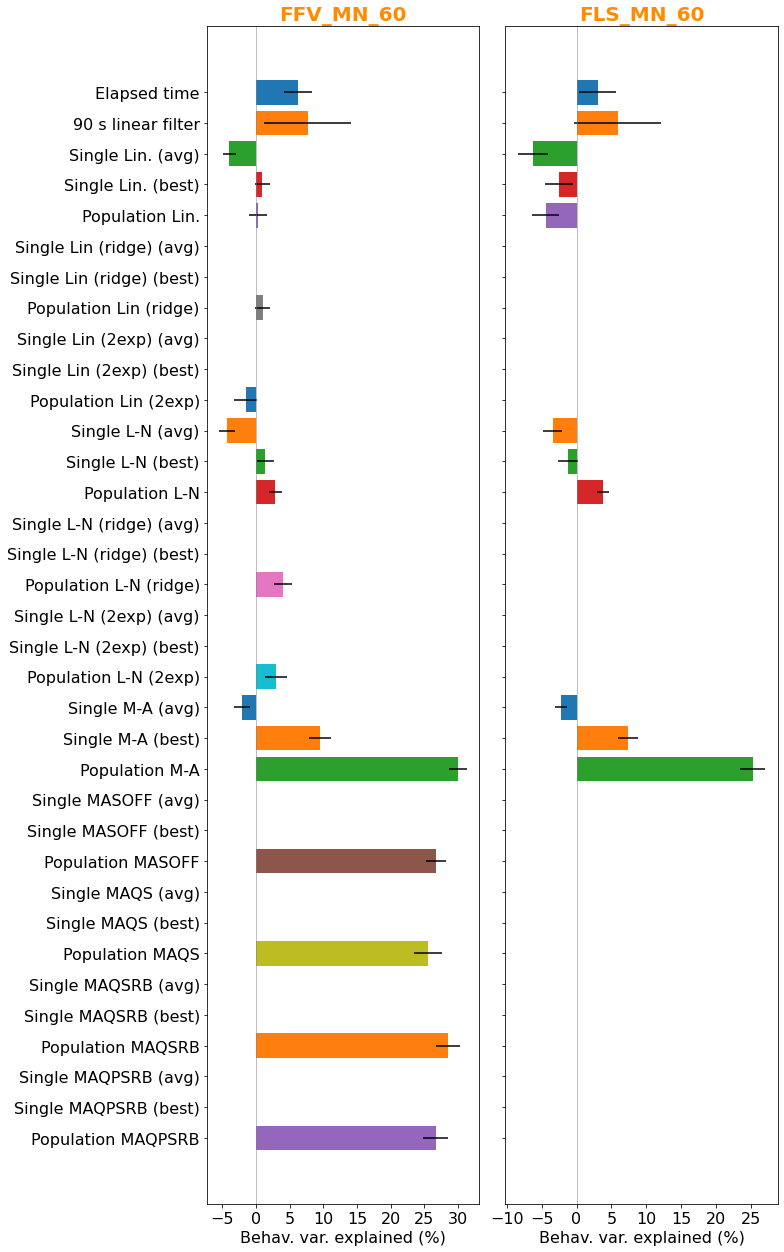

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(11, .5*len(rslts[KBEHAVS[0]])), tight_layout=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Behav. var. explained (%)', font_size=16)
    ax.set_title(kbehav, color='darkorange', fontweight='bold', fontsize=20)

### Paper figure

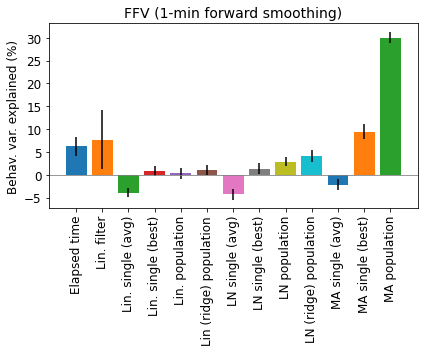

In [63]:
KBHV = 'FFV_MN_60'

rslts = []

# get prediction from timestamp only
fit_data = np.load(f'data/simple/mlv/neur_basic/nm91_zh23_{KBHV.lower()}_from_time.npy', allow_pickle=True)[0]
r2 = fit_data['r2_test'][KBHV].mean()
nsplit = len(fit_data['r2_test'][KBHV])
err = fit_data['r2_test'][KBHV].std()/np.sqrt(nsplit)

rslts.append(('Elapsed time', r2, err))

# purely linear fits
fit_data = np.load(f'data/simple/mlv/lin_filter/rc_lin_nm91_zh23_{KBHV.lower()}_ridge_alpha_10.npy', allow_pickle=True)[0]
nsplit = len(fit_data['r2_test'])

key = 'Lin. filter'
r2 = fit_data['r2_test'][KBHV].mean()
err = fit_data['r2_test'][KBHV].std()/np.sqrt(nsplit)

rslts.append((key, r2, err))
    
labels = {'lin': 'Lin.', 'linr': 'Lin (ridge)', 'ln': 'LN', 'lnr': 'LN (ridge)', 'ma': 'MA'}

for nrl_mdl in ['lin', 'linr', 'ln', 'lnr', 'ma']:
    # load single ROI results
    try:
        key = f'{labels[nrl_mdl]} single (avg)'
        fit_data = np.load(f'data/simple/mlv/neur_basic/baker_single_{nrl_mdl}_nm91_zh23_{KBHV.lower()}.npy', allow_pickle=True)[0]
        nsplit, nr = fit_data['r2s_test'][KBHV].shape

        # median single variance explained

        idx_med = np.argsort(fit_data['r2s_test'][KBHV].mean(axis=0))[nr//2]  # arg-median
        r2 = fit_data['r2s_test'][KBHV][:, idx_med].mean()
        err = fit_data['r2s_test'][KBHV][:, idx_med].std()/np.sqrt(nsplit)

        rslts.append((key, r2, err))

        # best single variance explained
        key = f'{labels[nrl_mdl]} single (best)'

        idx_best = fit_data['r2s_test'][KBHV].mean(axis=0).argmax()
        r2 = fit_data['r2s_test'][KBHV][:, idx_best].mean()
        err = fit_data['r2s_test'][KBHV][:, idx_best].std()/np.sqrt(nsplit)

        rslts.append((key, r2, err))
    except:
        pass
        
    # load population ROI results
    try:
        fit_data = np.load(f'data/simple/mlv/neur_basic/baker_{nrl_mdl}_nm91_zh23_{KBHV.lower()}_ridge_alpha_10.npy', allow_pickle=True)[0]

        key = f'{labels[nrl_mdl]} population'

        r2 = fit_data['r2_test'][KBHV].mean()
        nsplit = len(fit_data['r2_test'][KBHV])
        err = fit_data['r2_test'][KBHV].std()/np.sqrt(nsplit)

        rslts.append((key, r2, err))
    except:
        pass

fig, ax = plt.subplots(1, 1, figsize=(6, 5), tight_layout=True, sharey=True)
for crslt, (key, r2, err) in enumerate(rslts):
    ax.bar([crslt], [r2*100], yerr=[err*100])

ax.set_xticks(np.arange(len(rslts)))
ax.set_xticklabels([rslt[0] for rslt in rslts], rotation=90)

ax.axhline(0, color='gray', lw=.8)
set_plot(ax, y_label='Behav. var. explained (%)', font_size=12)
ax.set_title('FFV (1-min forward smoothing)', fontsize=14)

fig.savefig('ms/fig2a.svg')

# Analysis of perturbed neural population predictions of female locomotion

In [66]:
KBHVS_FOLDERS_KEYS = [
    ('ma', 'neur_basic', 'Full M-A population'),
    ('ma_non_select', 'ma_alt', 'No selectivity'),
    ('ma_pure_select', 'ma_alt', 'Pure selectivity'),
    ('ma_sine_select', 'ma_alt', 'Sine sel. only'),
    ('ma_pulse_select', 'ma_alt', 'Pulse sel. only'),
    ('ma_dep_only', 'ma_alt', 'Depolarizing only'),
    ('ma_hyp_only', 'ma_alt', 'Hyperpolarizing only'),
    ('ma_nonadapt', 'ma_alt', 'Nonadapting'),
    ('ma_tau_const', 'ma_alt', r'All med. $\tau_r, \tau_a$ (2s, 11s)'),
    ('ma_med_tau_a', 'ma_alt', r'All median $\tau_a$ (11s)'),
    ('ma_med_tau_r', 'ma_alt', r'All median $\tau_r$ (2s)'),
    ('ma_sia', 'ma_alt', 'Stim-invariant adapt'),
    ('ma_max_tau_a_1', 'ma_alt', r'All $\tau_a$<1s'),
    ('ma_max_tau_a_2', 'ma_alt', r'All $\tau_a$<2s'),
    ('ma_max_tau_a_5', 'ma_alt', r'All $\tau_a$<5s'),
    ('ma_max_tau_a_10', 'ma_alt', r'All $\tau_a$<10s'),
    ('ma_tau_a_0.5', 'ma_alt', r'All $\tau_a =$0.5s'),
    ('ma_tau_a_1', 'ma_alt', r'All $\tau_a =$1s'),
    ('ma_tau_a_2', 'ma_alt', r'All $\tau_a =$2s'),
    ('ma_tau_a_5', 'ma_alt', r'All $\tau_a =$5s'),
    ('ma_tau_r_5', 'ma_alt', r'All $\tau_r =$5s'),
    ('ma_tau_r_10', 'ma_alt', r'All $\tau_r =$10s'),
    ('ma_tau_r_15', 'ma_alt', r'All $\tau_r =$15s'),
    ('ma_tau_r_30', 'ma_alt', r'All $\tau_r =$30s'),
    ('ma_tau_r_60', 'ma_alt', r'All $\tau_r =$60s'),
    ('ma_tau_r_120', 'ma_alt', r'All $\tau_r =$120s'),
    ('ma_nonadapt_tau_r_60', 'ma_alt', r'All $\tau_r =$60s, nonadapting'),
    ('ma_max_tau_a_1_tau_r_120', 'ma_alt', r'All $\tau_a$<1, all $\tau_r =$120'),
    ('ma_max_tau_a_1_tau_r_120_pulse', 'ma_alt', r'All $\tau_a$<1, all $\tau_r =$120, pulse only'),
    ('ma_max_tau_a_1_tau_r_120_sine', 'ma_alt', r'All $\tau_a$<1, all $\tau_r =$120, sine only'),
#     ('ma_fast_adapt_slow_decay_pulse_only', 'ma_thry', r'Max $\tau_a$ 1, fixed $\tau_r$ 120, pulse only'),
#     ('ma_fast_adapt_slow_decay_var_select', 'ma_thry', r'Max $\tau_a$ 1, fixed $\tau_r$ 120, var select'),
#     ('ma_fast_adapt_slow_decay', 'ma_thry', r'Max $\tau_a$ 1, fixed $\tau_r$ 120, pure select'),
#     ('ma_fast_adapt_0.3_1_slow_decay', 'ma_thry', r'$\tau_a$ 0.3 or 1, fixed $\tau_r$ 120, pure select'),
#     ('ma_dense_fast_adapt_slow_decay', 'ma_thry', r'Max $\tau_a$ 1 (denser), fixed $\tau_r$ 120, pure select'),
]

rslts = []

for kbhv, folder, key in KBHVS_FOLDERS_KEYS:
    if folder != 'ma_thry':
        fit_data = np.load(f'data/simple/mlv/{folder}/baker_{kbhv}_nm91_zh23_ffv_mn_60_ridge_alpha_10.npy', allow_pickle=True)[0]
    elif folder == 'ma_thry':
        fit_data = np.load(f'data/simple/mlv/{folder}/{kbhv}_nm91_zh23_ffv_mn_60_ridge_alpha_10.npy', allow_pickle=True)[0]
        
    
    nsplit = len(fit_data['r2_test']['FFV_MN_60'])
    
    r2 = fit_data['r2_test']['FFV_MN_60'].mean()
    err = fit_data['r2_test']['FFV_MN_60'].std()/np.sqrt(nsplit)
#     r2 = fit_data['r2_test']['FFV'].mean()
#     err = fit_data['r2_test']['FFV'].std()/np.sqrt(nsplit)
    
    rslts.append((key, r2, err))

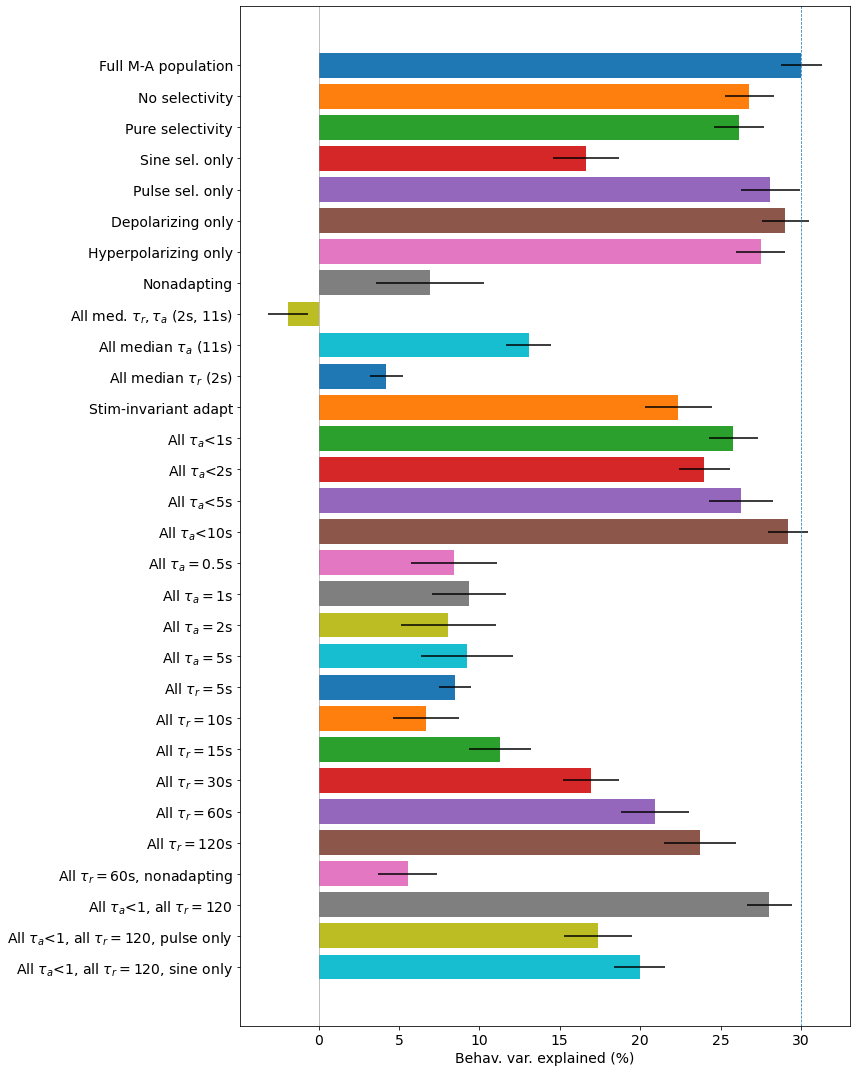

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(12, .5*len(rslts)), tight_layout=True, sharey=True)
for crslt, (key, r2, err) in enumerate(rslts):
    ax.barh([-crslt], [r2*100], xerr=[err*100])

ax.axvline(100*rslts[0][1], ls='--', lw=.75)
ax.set_yticks(-np.arange(len(rslts)))
ax.set_yticklabels([rslt[0] for rslt in rslts])

ax.axvline(0, color='gray', lw=.5)
set_plot(ax, x_label='Behav. var. explained (%)', font_size=14)

### Paper figure

In [149]:
KBHVS_FOLDERS_KEYS = [
    ('ma', 'neur_basic', 'Full MA population'),
    (None, None, None),
    ('ma_non_select', 'ma_alt', 'No selectivity'),
    ('ma_pure_select', 'ma_alt', 'Pure selectivity'),
    (None, None, None),
    ('ma_sine_select', 'ma_alt', 'Sine sel. only'),
    ('ma_pulse_select', 'ma_alt', 'Pulse sel. only'),
    (None, None, None),
    ('ma_dep_only', 'ma_alt', 'Depolarizing only'),
    ('ma_hyp_only', 'ma_alt', 'Hyperpolarizing only'),
    (None, None, None),
    ('ma_nonadapt', 'ma_alt', 'Nonadapting'),
    ('ma_sia', 'ma_alt', 'Stim-invariant adapt'),
    (None, None, None),
#     ('ma_tau_const', 'ma_alt', r'All med. $\tau_r, \tau_a$ (2s, 11s)'),
    ('ma_tau_a_0.5', 'ma_alt', r'$\tau_a =$.5s'),
    ('ma_tau_a_1', 'ma_alt', r'$\tau_a =$1s'),
    ('ma_tau_a_2', 'ma_alt', r'$\tau_a =$2s'),
    ('ma_tau_a_5', 'ma_alt', r'$\tau_a =$5s'),
    ('ma_med_tau_a', 'ma_alt', r'$\tau_a=$11s'),
    (None, None, None),
    ('ma_med_tau_r', 'ma_alt', r'$\tau_r=$2s'),
    ('ma_tau_r_5', 'ma_alt', r'$\tau_r =$5s'),
    ('ma_tau_r_10', 'ma_alt', r'$\tau_r =$10s'),
    ('ma_tau_r_15', 'ma_alt', r'$\tau_r =$15s'),
    ('ma_tau_r_30', 'ma_alt', r'$\tau_r =$30s'),
    ('ma_tau_r_60', 'ma_alt', r'$\tau_r =$60s'),
    ('ma_tau_r_120', 'ma_alt', r'$\tau_r =$120s'),
    (None, None, None),
    ('ma_max_tau_a_1', 'ma_alt', r'$\tau_a$ < 1s'),
    ('ma_max_tau_a_2', 'ma_alt', r'$\tau_a$ < 2s'),
    ('ma_max_tau_a_5', 'ma_alt', r'$\tau_a$ < 5s'),
    ('ma_max_tau_a_10', 'ma_alt', r'$\tau_a$ < 10s'),
    (None, None, None),
    ('ma_max_tau_a_1_tau_r_120', 'ma_alt', r'$\tau_a < 1s$, $\tau_r =$120s'),
    (None, None, None),
    ('ma_max_tau_a_1_tau_r_120_pulse', 'ma_alt', r'P only, $\tau_a$<1s, $\tau_r =$120s'),
    ('ma_max_tau_a_1_tau_r_120_sine', 'ma_alt', r'S only, $\tau_a$<1s, $\tau_r =$120s'),
#     ('ma_fast_adapt_slow_decay_pulse_only', 'ma_thry', r'Max $\tau_a$ 1, fixed $\tau_r$ 120, pulse only'),
#     ('ma_fast_adapt_slow_decay_var_select', 'ma_thry', r'Max $\tau_a$ 1, fixed $\tau_r$ 120, var select'),
#     ('ma_fast_adapt_slow_decay', 'ma_thry', r'Max $\tau_a$ 1, fixed $\tau_r$ 120, pure select'),
#     ('ma_fast_adapt_0.3_1_slow_decay', 'ma_thry', r'$\tau_a$ 0.3 or 1, fixed $\tau_r$ 120, pure select'),
#     ('ma_dense_fast_adapt_slow_decay', 'ma_thry', r'Max $\tau_a$ 1 (denser), fixed $\tau_r$ 120, pure select'),
]

rslts = []

for kbhv, folder, key in KBHVS_FOLDERS_KEYS:
    if folder is not None:
        fit_data = np.load(f'data/simple/mlv/{folder}/baker_{kbhv}_nm91_zh23_ffv_mn_60_ridge_alpha_10.npy', allow_pickle=True)[0]
        nsplit = len(fit_data['r2_test']['FFV_MN_60'])

        r2 = fit_data['r2_test']['FFV_MN_60'].mean()
        err = fit_data['r2_test']['FFV_MN_60'].std()/np.sqrt(nsplit)
#         r2 = fit_data['r2_test']['FFV'].mean()
#         err = fit_data['r2_test']['FFV'].std()/np.sqrt(nsplit)
    else:
        r2 = np.nan
        err = np.nan
    
    rslts.append((key, r2, err))

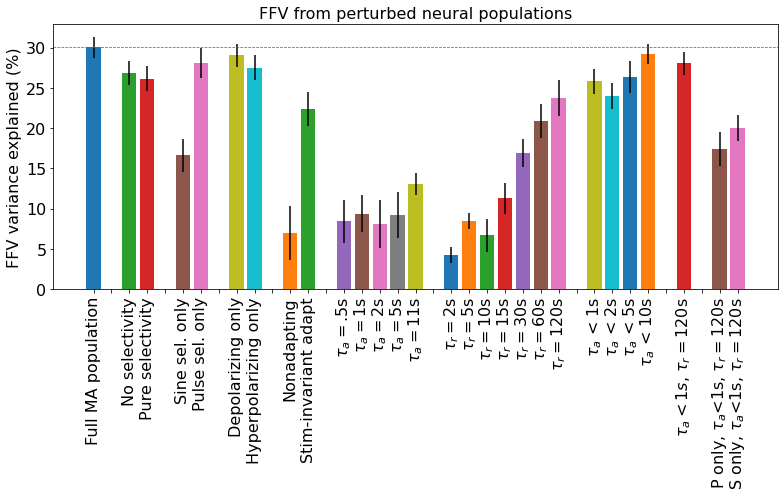

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(11, 7), tight_layout=True, sharey=True)
for crslt, (key, r2, err) in enumerate(rslts):
    ax.bar([crslt], [r2*100], yerr=[err*100])

ax.axhline(100*rslts[0][1], ls='--', lw=.75)
ax.set_xticks(np.arange(len(rslts)))
ax.set_xticklabels([rslt[0] for rslt in rslts], rotation=90)

ax.axhline(0, color='gray', lw=.5)
set_plot(ax, y_label='FFV variance explained (%)', title='FFV from perturbed neural populations', font_size=16)

fig.savefig('ms/fig2e.svg')

# Analysis of reduced population neural recordings

In [154]:
KBHVS_FOLDERS_KEYS = [
    ('ma', 'neur_basic', 'Full M-A population'),
    ('ma_fast_adapt_slow_decay_pulse_only', 'ma_thry', r'P only, $\tau_a$ < 1s, $\tau_r$ = 120s'),
    ('ma_fast_adapt_slow_decay_var_select', 'ma_thry', r'Mixed sel, $\tau_a$ < 1s, $\tau_r$ = 120s'),
    ('ma_fast_adapt_slow_decay', 'ma_thry', r'Pure sel, $\tau_a$ < 1s, $\tau_r$ = 120s'),
    ('ma_fast_adapt_0.3_1_slow_decay', 'ma_thry', r'Pure sel, $\tau_a$ = 0.3 or 1, $\tau_r$ = 120s'),
    ('ma_dense_fast_adapt_slow_decay', 'ma_thry', r'Pure sel, $\tau_a$ 1 (denser), $\tau_r$ 120'),
]

rslts = []

for kbhv, folder, key in KBHVS_FOLDERS_KEYS:
    if folder != 'ma_thry':
        fit_data = np.load(f'data/simple/mlv/{folder}/baker_{kbhv}_nm91_zh23_ffv_mn_60_ridge_alpha_10.npy', allow_pickle=True)[0]
    elif folder == 'ma_thry':
        fit_data = np.load(f'data/simple/mlv/{folder}/{kbhv}_nm91_zh23_ffv_mn_60_ridge_alpha_10.npy', allow_pickle=True)[0]
        
    
    nsplit = len(fit_data['r2_test']['FFV_MN_60'])
    
    r2 = fit_data['r2_test']['FFV_MN_60'].mean()
    err = fit_data['r2_test']['FFV_MN_60'].std()/np.sqrt(nsplit)
#     r2 = fit_data['r2_test']['FFV'].mean()
#     err = fit_data['r2_test']['FFV'].std()/np.sqrt(nsplit)
    
    rslts.append((key, r2, err))

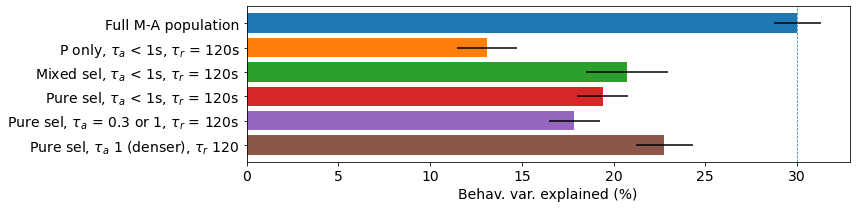

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(12, .5*len(rslts)), tight_layout=True, sharey=True)
for crslt, (key, r2, err) in enumerate(rslts):
    ax.barh([-crslt], [r2*100], xerr=[err*100])

ax.axvline(100*rslts[0][1], ls='--', lw=.75)
ax.set_yticks(-np.arange(len(rslts)))
ax.set_yticklabels([rslt[0] for rslt in rslts])

ax.axvline(0, color='gray', lw=.5)
set_plot(ax, x_label='Behav. var. explained (%)', font_size=14)

## Paper figure

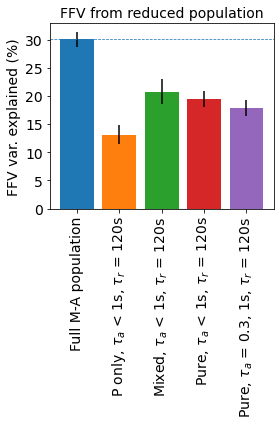

In [165]:
KBHVS_FOLDERS_KEYS = [
    ('ma', 'neur_basic', 'Full M-A population'),
    ('ma_fast_adapt_slow_decay_pulse_only', 'ma_thry', r'P only, $\tau_a$ < 1s, $\tau_r$ = 120s'),
    ('ma_fast_adapt_slow_decay_var_select', 'ma_thry', r'Mixed, $\tau_a$ < 1s, $\tau_r$ = 120s'),
    ('ma_fast_adapt_slow_decay', 'ma_thry', r'Pure, $\tau_a$ < 1s, $\tau_r$ = 120s'),
    ('ma_fast_adapt_0.3_1_slow_decay', 'ma_thry', r'Pure, $\tau_a$ = 0.3, 1s, $\tau_r$ = 120s'),
#     ('ma_dense_fast_adapt_slow_decay', 'ma_thry', r'Max $\tau_a$ 1 (denser), fixed $\tau_r$ 120, pure select'),
]

rslts = []

for kbhv, folder, key in KBHVS_FOLDERS_KEYS:
    if folder != 'ma_thry':
        fit_data = np.load(f'data/simple/mlv/{folder}/baker_{kbhv}_nm91_zh23_ffv_mn_60_ridge_alpha_10.npy', allow_pickle=True)[0]
    elif folder == 'ma_thry':
        fit_data = np.load(f'data/simple/mlv/{folder}/{kbhv}_nm91_zh23_ffv_mn_60_ridge_alpha_10.npy', allow_pickle=True)[0]
        
    
    nsplit = len(fit_data['r2_test']['FFV_MN_60'])
    
    r2 = fit_data['r2_test']['FFV_MN_60'].mean()
    err = fit_data['r2_test']['FFV_MN_60'].std()/np.sqrt(nsplit)
#     r2 = fit_data['r2_test']['FFV'].mean()
#     err = fit_data['r2_test']['FFV'].std()/np.sqrt(nsplit)
    
    rslts.append((key, r2, err))

fig, ax = plt.subplots(1, 1, figsize=(4, 6), tight_layout=True, sharey=True)
for crslt, (key, r2, err) in enumerate(rslts):
    ax.bar([crslt], [r2*100], yerr=[err*100])

ax.axhline(100*rslts[0][1], ls='--', lw=.75)
ax.set_xticks(np.arange(len(rslts)))
ax.set_xticklabels([rslt[0] for rslt in rslts], rotation=90)

ax.axhline(0, color='gray', lw=.5)
set_plot(ax, y_label='FFV var. explained (%)', title='FFV from reduced population', font_size=14)

fig.savefig('ms/fig2f.svg')

# Neural activity projected onto top PCs

In [9]:
KBEHAVS = ['FFV', 'FLS']

rslts = {kbehav: [] for kbehav in KBEHAVS}

# load population ROI results
for npc in [3, 10, 224]:
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv/neur_basic/baker_ma_pca_npc_{npc}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]

        key = f'MA neurons\n{npc} PCs'

        r2 = fit_data['r2_test'].mean()
        nsplit = len(fit_data['r2_test'])
        err = fit_data['r2_test'].std()/np.sqrt(nsplit)

        rslts[kbehav].append((key, r2, err))

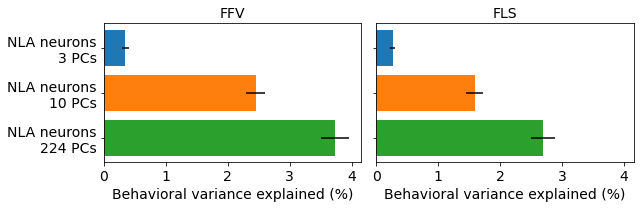

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(9, len(rslts[KBEHAVS[0]])), tight_layout=True, sharex=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Behavioral variance explained (%)', title=kbehav, font_size=14)